In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# this is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
# configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [4]:
autoencoder.fit(x_train, x_train,
epochs=10,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 8/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 9/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6931 - val_loss: 0.693

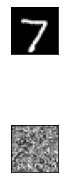

In [5]:
n = 20 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
# display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
 
 
 
# display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()